In [3]:

%%javascript

IPython.keyboard_manager.command_shortcuts.add_shortcut('Ctrl-k', {
    help : 'move up selected cells',
    help_index : 'jupyter-notebook:move-selection-up',
    handler : function (event) {
        IPython.notebook.move_selection_up();
        return false;
    }}
);

IPython.keyboard_manager.command_shortcuts.add_shortcut('Ctrl-j', {
    help : 'move down selected cells',
    help_index : 'jupyter-notebook:move-selection-down',
    handler :  function (event) {
        IPython.notebook.move_selection_down();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inline as inline

%matplotlib inline

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 121)

pd.options.mode.chained_assignment = None

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv('events.csv', low_memory = False)


## Operating System durante los meses

In [26]:
df_osv = df.loc[df['operating_system_version'].notnull(), : ]
person_osv = df_osv[['person', ]]
df_osv = df_osv[['timestamp', 'operating_system_version','person']]
df_osv.head()
os = df_osv['operating_system_version'].value_counts()
s_os = os.nlargest(10)
os.describe()

count      121.000000
mean       722.132231
std       2698.707941
min          1.000000
25%          2.000000
50%          8.000000
75%        139.000000
max      19675.000000
Name: operating_system_version, dtype: float64

In [6]:
person_osv.describe()

,person
count,87378
unique,26899
top,6b07be7b
freq,263


In [7]:
df_windows = df_osv.loc[df_osv['operating_system_version'].str.contains('Windows')]
df_ios = df_osv.loc[df_osv['operating_system_version'].str.contains('iOS')]
df_android = df_osv.loc[df_osv['operating_system_version'].str.contains('Android')]
df_mac = df_osv.loc[df_osv['operating_system_version'].str.contains('Mac')]

df_windows['OS'] = 'Windows'
df_ios['OS'] = 'iOS'
df_android['OS'] = 'Android'
df_mac['OS'] = 'Mac'

df_windows = df_windows[['timestamp','OS','person']]
df_ios = df_ios[['timestamp','OS','person']]
df_android = df_android[['timestamp','OS','person']]
df_mac = df_mac[['timestamp','OS','person']]




frames = [df_windows, df_ios, df_android, df_mac]
df_os = pd.concat(frames)

In [8]:
df_os['date'] = pd.to_datetime(df_os['timestamp'])
df_os['month'] = df_os['date'].dt.month
ct = pd.crosstab(df_os.month, df_os.OS)
ct.head(10)
ct


OS,Android,Mac,Windows,iOS
month,,,,
1,1055,1,959,117
2,1368,12,1304,99
3,3384,42,3515,286
4,5782,66,6324,411
5,18872,175,19177,1658
6,10949,110,10216,968


Text(67.25,0.5,'Month')

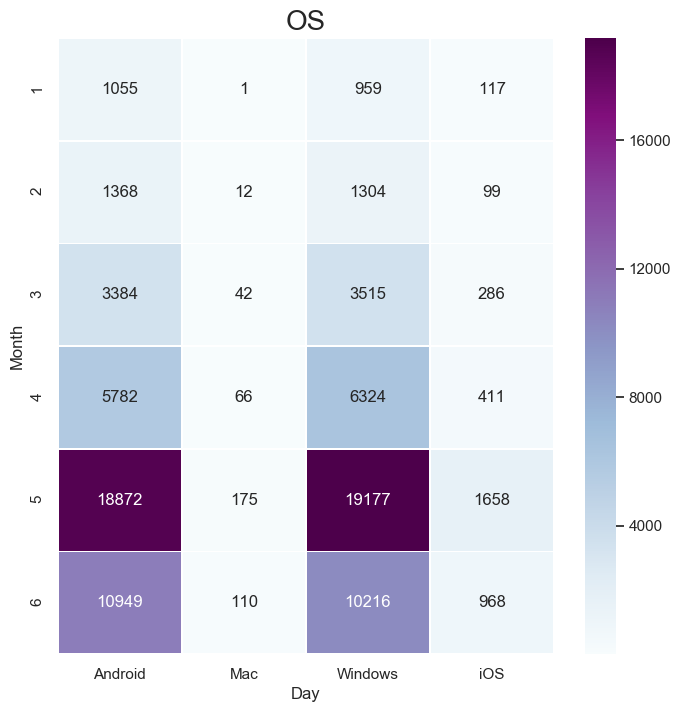

In [9]:
plt.subplots(figsize=(8,8))
grafico_dia_mes=sns.heatmap(ct,linewidths=.5,fmt="d",annot=True,cmap="BuPu")
grafico_dia_mes.set_title("OS",fontsize=20)
grafico_dia_mes.set_xlabel("Day",fontsize=12)
grafico_dia_mes.set_ylabel("Month",fontsize=12)

## Android

In [10]:
df_android_search = df[df['person'].isin(df_android['person'])]
df_android_search = df_android_search[df_android_search['event'] == 'viewed product']
top_10_models_viewed_android = df_android_search['model'].value_counts().head(10)

Text(0,0.5,'Frequency')

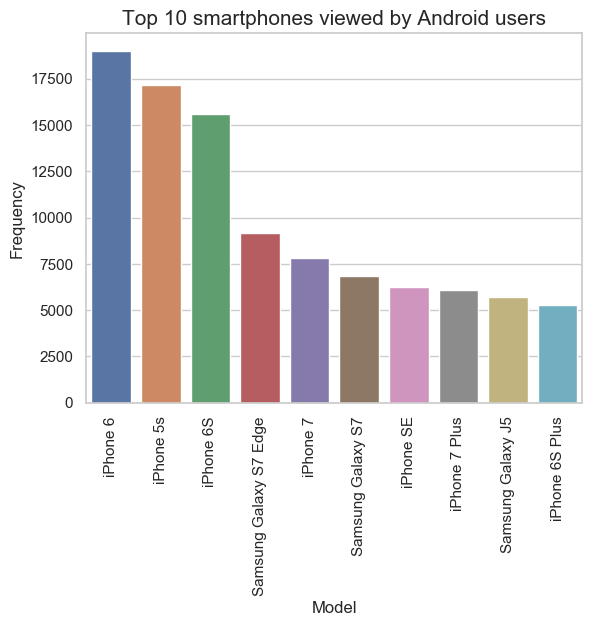

In [11]:
g = sns.barplot(x=top_10_models_viewed_android.index, y=top_10_models_viewed_android.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Top 10 smartphones viewed by Android users", fontsize = 15)
g.set_xlabel("Model", fontsize = 12)
g.set_ylabel("Frequency", fontsize = 12)

In [21]:
df_android_conversion = df[df['person'].isin(df_android['person'])]
df_android_conversion = df_android_conversion[df_android_conversion['event'] == 'conversion']
df_android_conversion.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,600,600,600,0.0,600,600,600,600,600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,600,1,327,0.0,296,95,4,8,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
top,2018-03-30 01:56:50,conversion,4200bdee,NaN,6371.0,iPhone 5s,Bom,16GB,Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,600,12,NaN,21,48,296,294,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## iOS

In [12]:
df_iOS_search = df[df['person'].isin(df_ios['person'])]
df_iOS_search = df_iOS_search[df_iOS_search['event'] == 'viewed product']
top_10_models_viewed_iOS = df_iOS_search['model'].value_counts().head(10)

Text(0,0.5,'Frequency')

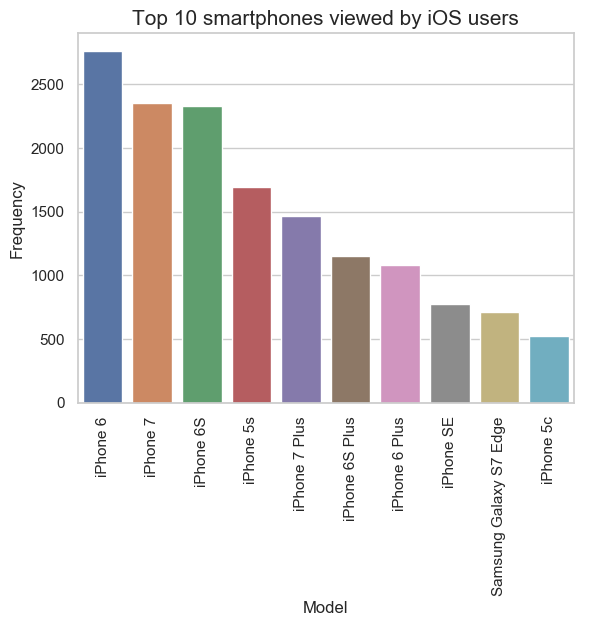

In [13]:
g = sns.barplot(x=top_10_models_viewed_iOS.index, y=top_10_models_viewed_iOS.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Top 10 smartphones viewed by iOS users", fontsize = 15)
g.set_xlabel("Model", fontsize = 12)
g.set_ylabel("Frequency", fontsize = 12)

In [25]:
df_ios_conversion = df[df['person'].isin(df_ios['person'])]
df_ios_conversion = df_ios_conversion[df_ios_conversion['event'] == 'conversion']
df_ios_conversion.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,88,88,88,0.0,88,88,88,88,88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,88,1,54,0.0,60,32,4,7,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
top,2018-04-16 01:56:46,conversion,9417a49e,NaN,2692.0,iPhone 6,Bom,16GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,88,5,NaN,4,15,40,41,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
